# COVID-19 Data Analysis


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("owid-covid-data.csv")

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [7]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


In [8]:
df["continent"].head()

0    Asia
1    Asia
2    Asia
3    Asia
4    Asia
Name: continent, dtype: object

In [24]:
africa = df[df["continent"] == "Africa"]

In [25]:
africa.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
5022,DZA,Africa,Algeria,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748,44903228,NaN,NaN,NaN,NaN
5023,DZA,Africa,Algeria,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748,44903228,NaN,NaN,NaN,NaN
5024,DZA,Africa,Algeria,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748,44903228,NaN,NaN,NaN,NaN
5025,DZA,Africa,Algeria,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748,44903228,NaN,NaN,NaN,NaN
5026,DZA,Africa,Algeria,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748,44903228,NaN,NaN,NaN,NaN


In [26]:
africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95419 entries, 5022 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    95419 non-null  object 
 1   continent                                   95419 non-null  object 
 2   location                                    95419 non-null  object 
 3   date                                        95419 non-null  object 
 4   total_cases                                 95418 non-null  float64
 5   new_cases                                   95411 non-null  float64
 6   new_cases_smoothed                          95126 non-null  float64
 7   total_deaths                                95418 non-null  float64
 8   new_deaths                                  95416 non-null  float64
 9   new_deaths_smoothed                         95131 non-null  float64
 10  total_cases

In [27]:
africa.isnull().sum()

iso_code                                       0
continent                                      0
location                                       0
date                                           0
total_cases                                    1
                                           ...  
population                                     0
excess_mortality_cumulative_absolute       94520
excess_mortality_cumulative                94520
excess_mortality                           94520
excess_mortality_cumulative_per_million    94520
Length: 67, dtype: int64

In [28]:
africa = africa[["location", "date", "total_cases", "total_deaths", "new_deaths", "total_vaccinations", "total_tests", "new_tests", "positive_rate", "people_vaccinated", "people_fully_vaccinated"]]

In [29]:
africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95419 entries, 5022 to 429434
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 95419 non-null  object 
 1   date                     95419 non-null  object 
 2   total_cases              95418 non-null  float64
 3   total_deaths             95418 non-null  float64
 4   new_deaths               95416 non-null  float64
 5   total_vaccinations       6346 non-null   float64
 6   total_tests              11454 non-null  float64
 7   new_tests                10458 non-null  float64
 8   positive_rate            19664 non-null  float64
 9   people_vaccinated        5968 non-null   float64
 10  people_fully_vaccinated  5133 non-null   float64
dtypes: float64(9), object(2)
memory usage: 8.7+ MB


In [30]:
africa.head()

,location,date,total_cases,total_deaths,new_deaths,total_vaccinations,total_tests,new_tests,positive_rate,people_vaccinated,people_fully_vaccinated
5022,Algeria,2020-01-05,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5023,Algeria,2020-01-06,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5024,Algeria,2020-01-07,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5025,Algeria,2020-01-08,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5026,Algeria,2020-01-09,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
asia = df[df["continent"] == "Asia"]

In [32]:
asia = asia[["location", "date", "total_cases", "total_deaths", "new_deaths", "total_vaccinations", "total_tests", "new_tests", "positive_rate", "people_vaccinated", "people_fully_vaccinated"]]

In [33]:
asia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84199 entries, 0 to 426086
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 84199 non-null  object 
 1   date                     84199 non-null  object 
 2   total_cases              78678 non-null  float64
 3   total_deaths             78678 non-null  float64
 4   new_deaths               78675 non-null  float64
 5   total_vaccinations       19153 non-null  float64
 6   total_tests              20562 non-null  float64
 7   new_tests                20262 non-null  float64
 8   positive_rate            24560 non-null  float64
 9   people_vaccinated        18026 non-null  float64
 10  people_fully_vaccinated  17206 non-null  float64
dtypes: float64(9), object(2)
memory usage: 7.7+ MB


In [34]:
europe = df[df["continent"] == "Europe"]

In [35]:
europe = europe[["location", "date", "total_cases", "total_deaths", "new_deaths", "total_vaccinations", "total_tests", "new_tests", "positive_rate", "people_vaccinated", "people_fully_vaccinated"]]

In [36]:
europe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91031 entries, 3348 to 421053
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 91031 non-null  object 
 1   date                     91031 non-null  object 
 2   total_cases              85374 non-null  float64
 3   total_deaths             85374 non-null  float64
 4   new_deaths               84190 non-null  float64
 5   total_vaccinations       27137 non-null  float64
 6   total_tests              27095 non-null  float64
 7   new_tests                26201 non-null  float64
 8   positive_rate            30424 non-null  float64
 9   people_vaccinated        25285 non-null  float64
 10  people_fully_vaccinated  24428 non-null  float64
dtypes: float64(9), object(2)
memory usage: 8.3+ MB


In [37]:
north_america = df[df["continent"] == "North America"]

In [38]:
north_america = north_america[["location", "date", "total_cases", "total_deaths", "new_deaths", "total_vaccinations", "total_tests", "new_tests", "positive_rate", "people_vaccinated", "people_fully_vaccinated"]]

In [39]:
north_america.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68638 entries, 11718 to 406798
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 68638 non-null  object 
 1   date                     68638 non-null  object 
 2   total_cases              68634 non-null  float64
 3   total_deaths             68634 non-null  float64
 4   new_deaths               68630 non-null  float64
 5   total_vaccinations       8954 non-null   float64
 6   total_tests              9910 non-null   float64
 7   new_tests                9219 non-null   float64
 8   positive_rate            12119 non-null  float64
 9   people_vaccinated        8301 non-null   float64
 10  people_fully_vaccinated  8018 non-null   float64
dtypes: float64(9), object(2)
memory usage: 6.3+ MB


In [40]:
south_america = df[df["continent"] == "South America"]

In [41]:
south_america = south_america[["location", "date", "total_cases", "total_deaths", "new_deaths", "total_vaccinations", "total_tests", "new_tests", "positive_rate", "people_vaccinated", "people_fully_vaccinated"]]

In [42]:
south_america.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23440 entries, 15066 to 418181
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 23440 non-null  object 
 1   date                     23440 non-null  object 
 2   total_cases              23436 non-null  float64
 3   total_deaths             23436 non-null  float64
 4   new_deaths               23435 non-null  float64
 5   total_vaccinations       6478 non-null   float64
 6   total_tests              6838 non-null   float64
 7   new_tests                5985 non-null   float64
 8   positive_rate            6653 non-null   float64
 9   people_vaccinated        6393 non-null   float64
 10  people_fully_vaccinated  6324 non-null   float64
dtypes: float64(9), object(2)
memory usage: 2.1+ MB


In [ ]:
selected = ["United States", "India", "Kenya", "Ghana", "China", "Brazil", "Nigeria", "Australia", "Sweden", "Japan", "Russia"]
selected_countries = df[df['location'].isin(selected)]


## Data Cleaning

In [101]:
selected_countries = selected_countries[["location", "date", "total_cases", "total_deaths", "new_deaths", "total_vaccinations", "total_tests", "new_tests", "positive_rate", "people_vaccinated", "people_fully_vaccinated"]]

In [69]:
selected_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18422 entries, 21776 to 405124
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 18422 non-null  object 
 1   date                     18422 non-null  object 
 2   total_cases              18414 non-null  float64
 3   total_deaths             18414 non-null  float64
 4   new_deaths               18412 non-null  float64
 5   total_vaccinations       5985 non-null   float64
 6   total_tests              6100 non-null   float64
 7   new_tests                5549 non-null   float64
 8   positive_rate            7965 non-null   float64
 9   people_vaccinated        5083 non-null   float64
 10  people_fully_vaccinated  5046 non-null   float64
dtypes: float64(9), object(2)
memory usage: 1.7+ MB


In [70]:
selected_countries.isnull().sum()

location                       0
date                           0
total_cases                    8
total_deaths                   8
new_deaths                    10
total_vaccinations         12437
total_tests                12322
new_tests                  12873
positive_rate              10457
people_vaccinated          13339
people_fully_vaccinated    13376
dtype: int64

In [71]:
selected_countries["date"] = pd.to_datetime(selected_countries["date"])

In [74]:
selected_countries.head(10)

,location,date,total_cases,total_deaths,new_deaths,total_vaccinations,total_tests,new_tests,positive_rate,people_vaccinated,people_fully_vaccinated
21776,Australia,2020-01-05,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
21777,Australia,2020-01-06,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
21778,Australia,2020-01-07,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
21779,Australia,2020-01-08,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
21780,Australia,2020-01-09,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
21781,Australia,2020-01-10,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
21782,Australia,2020-01-11,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
21783,Australia,2020-01-12,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
21784,Australia,2020-01-13,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
21785,Australia,2020-01-14,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
selected_countries.describe()

,date,total_cases,total_deaths,new_deaths,total_vaccinations,total_tests,new_tests,positive_rate,people_vaccinated,people_fully_vaccinated
count,18422,1.841400e+04,1.841400e+04,18412.000000,5.985000e+03,6.100000e+03,5.549000e+03,7965.000000,5.083000e+03,5.046000e+03
mean,2022-04-20 20:45:54.619476736,1.729494e+07,1.853562e+05,167.940962,7.839170e+08,1.254075e+08,3.770954e+05,0.069475,2.918118e+08,2.539641e+08
min,2020-01-05 00:00:00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,4.000000e+00,4.000000e+00,0.000000,0.000000e+00,3.000000e+00
25%,2021-02-26 00:00:00,1.681270e+05,2.895000e+03,0.000000,5.396347e+07,1.832268e+06,1.753300e+04,0.011800,2.200982e+07,1.976138e+07
50%,2022-04-21 00:00:00,2.497864e+06,1.837900e+04,0.000000,3.244628e+08,1.780029e+07,7.149800e+04,0.041200,1.046682e+08,1.027585e+08
75%,2023-06-13 18:00:00,2.425480e+07,3.282060e+05,0.000000,1.299875e+09,9.641835e+07,4.966880e+05,0.089000,2.682885e+08,2.272010e+08
max,2024-08-12 00:00:00,1.034368e+08,1.193165e+06,47687.000000,3.491077e+09,9.214000e+09,3.585563e+07,0.791900,1.310292e+09,1.276760e+09
std,NaN,2.794452e+07,3.010766e+05,1278.657996,1.009910e+09,2.543697e+08,7.386086e+05,0.092046,3.763325e+08,3.448836e+08


In [75]:
cummulative_columns = ["total_cases", "total_deaths", "total_vaccinations", "total_tests",
                   "people_vaccinated", "people_fully_vaccinated"]

for column in cummulative_columns:
    selected_countries[column] = selected_countries.groupby("location")[column].ffill()


In [76]:
selected_countries["new_deaths"] = selected_countries.groupby("location")["new_deaths"].transform("mean").round().fillna(selected_countries["new_deaths"])
selected_countries["new_tests"] = selected_countries.groupby("location")["new_tests"].transform("mean").round().fillna(selected_countries["new_tests"])
selected_countries["positive_rate"] = selected_countries.groupby("location")["positive_rate"].transform("mean").round().fillna(selected_countries["positive_rate"])


In [77]:
selected_countries.isnull().sum()

location                      0
date                          0
total_cases                   0
total_deaths                  0
new_deaths                    0
total_vaccinations         4242
total_tests                 962
new_tests                  1674
positive_rate              1674
people_vaccinated          4419
people_fully_vaccinated    4905
dtype: int64

In [78]:
selected_countries.head()

,location,date,total_cases,total_deaths,new_deaths,total_vaccinations,total_tests,new_tests,positive_rate,people_vaccinated,people_fully_vaccinated
21776,Australia,2020-01-05,0.0,0.0,15.0,NaN,NaN,87651.0,0.0,NaN,NaN
21777,Australia,2020-01-06,0.0,0.0,15.0,NaN,NaN,87651.0,0.0,NaN,NaN
21778,Australia,2020-01-07,0.0,0.0,15.0,NaN,NaN,87651.0,0.0,NaN,NaN
21779,Australia,2020-01-08,0.0,0.0,15.0,NaN,NaN,87651.0,0.0,NaN,NaN
21780,Australia,2020-01-09,0.0,0.0,15.0,NaN,NaN,87651.0,0.0,NaN,NaN


In [79]:
selected_countries.tail()

,location,date,total_cases,total_deaths,new_deaths,total_vaccinations,total_tests,new_tests,positive_rate,people_vaccinated,people_fully_vaccinated
405120,United States,2024-07-31,103436829.0,1192546.0,713.0,676728782.0,912769124.0,1086630.0,0.0,270227181.0,230637348.0
405121,United States,2024-08-01,103436829.0,1192546.0,713.0,676728782.0,912769124.0,1086630.0,0.0,270227181.0,230637348.0
405122,United States,2024-08-02,103436829.0,1192546.0,713.0,676728782.0,912769124.0,1086630.0,0.0,270227181.0,230637348.0
405123,United States,2024-08-03,103436829.0,1192546.0,713.0,676728782.0,912769124.0,1086630.0,0.0,270227181.0,230637348.0
405124,United States,2024-08-04,103436829.0,1193165.0,713.0,676728782.0,912769124.0,1086630.0,0.0,270227181.0,230637348.0


In [83]:
countries = selected_countries.dropna()

In [84]:
countries.head()

,location,date,total_cases,total_deaths,new_deaths,total_vaccinations,total_tests,new_tests,positive_rate,people_vaccinated,people_fully_vaccinated
22191,Australia,2021-02-23,28926.0,924.0,15.0,6914.0,14133828.0,87651.0,0.0,6911.0,3.0
22192,Australia,2021-02-24,28926.0,924.0,15.0,16629.0,14190604.0,87651.0,0.0,16626.0,3.0
22193,Australia,2021-02-25,28926.0,924.0,15.0,23510.0,14240544.0,87651.0,0.0,23501.0,9.0
22194,Australia,2021-02-26,28926.0,924.0,15.0,30000.0,14288443.0,87651.0,0.0,29989.0,11.0
22195,Australia,2021-02-27,28926.0,924.0,15.0,31894.0,14321865.0,87651.0,0.0,31882.0,12.0


## Exploratory Data Analysis

In [87]:
countries["death_rate"] = countries["total_deaths"] / countries["total_cases"]

C:\Users\hp\AppData\Local\Temp\ipykernel_4356\1302724736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries["death_rate"] = countries["total_deaths"] / countries["total_cases"]


In [88]:
countries.columns

Index(['location', 'date', 'total_cases', 'total_deaths', 'new_deaths',
       'total_vaccinations', 'total_tests', 'new_tests', 'positive_rate',
       'people_vaccinated', 'people_fully_vaccinated', 'death_rate'],
      dtype='object')

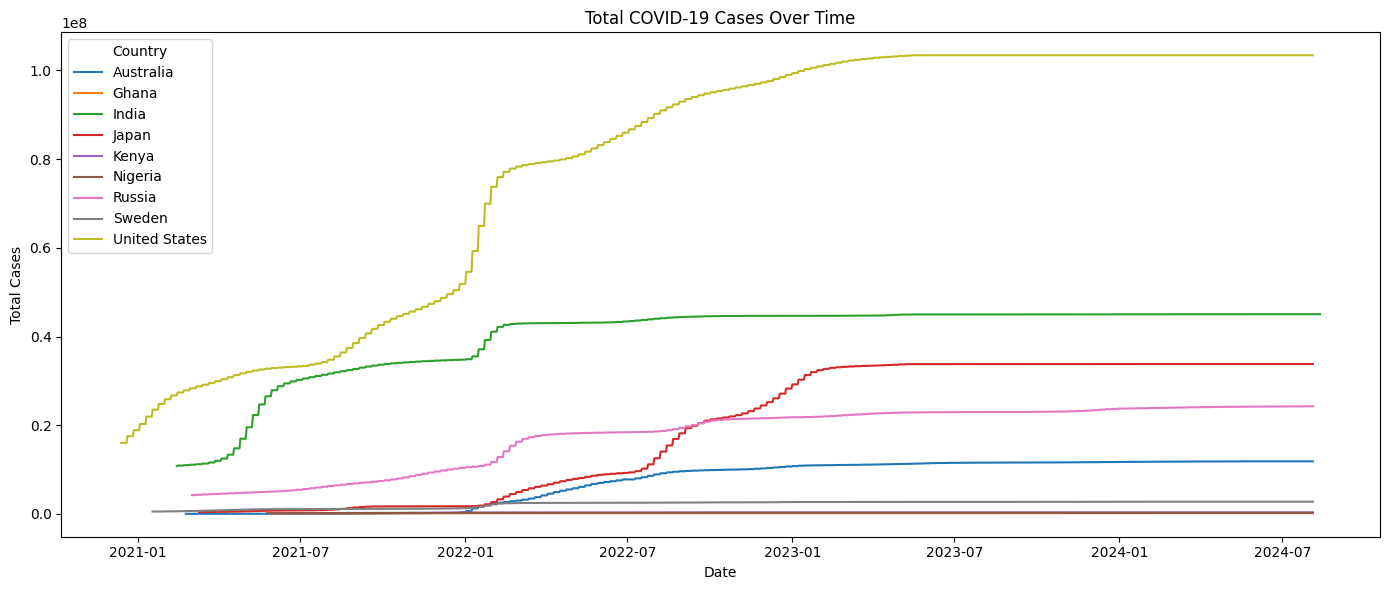

In [93]:
plt.figure(figsize=(14, 6))
sns.lineplot(countries, x="date", y="total_cases", hue="location")
plt.title("Total COVID-19 Cases Over Time")
plt.ylabel("Total Cases")
plt.xlabel("Date")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

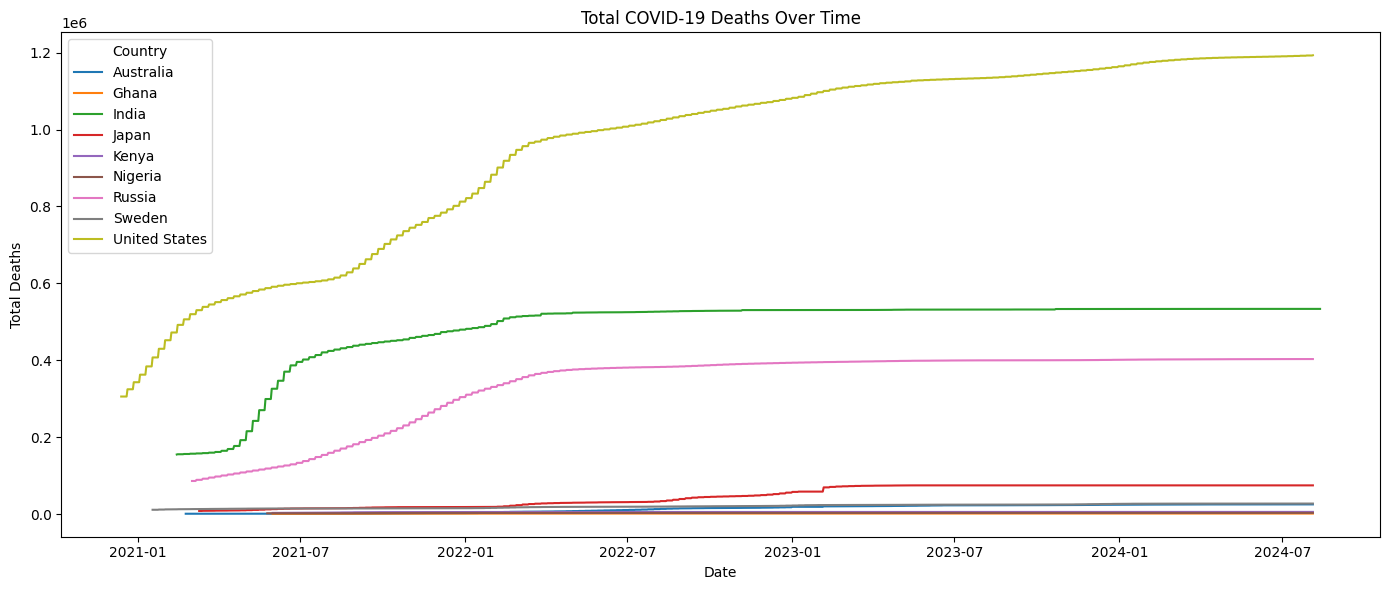

In [95]:
plt.figure(figsize=(14, 6))
sns.lineplot(countries, x="date", y="total_deaths", hue="location")
plt.title("Total COVID-19 Deaths Over Time")
plt.ylabel("Total Deaths")
plt.xlabel("Date")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4356\1205567009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(countries, x="total_cases", y="location", palette="viridis")


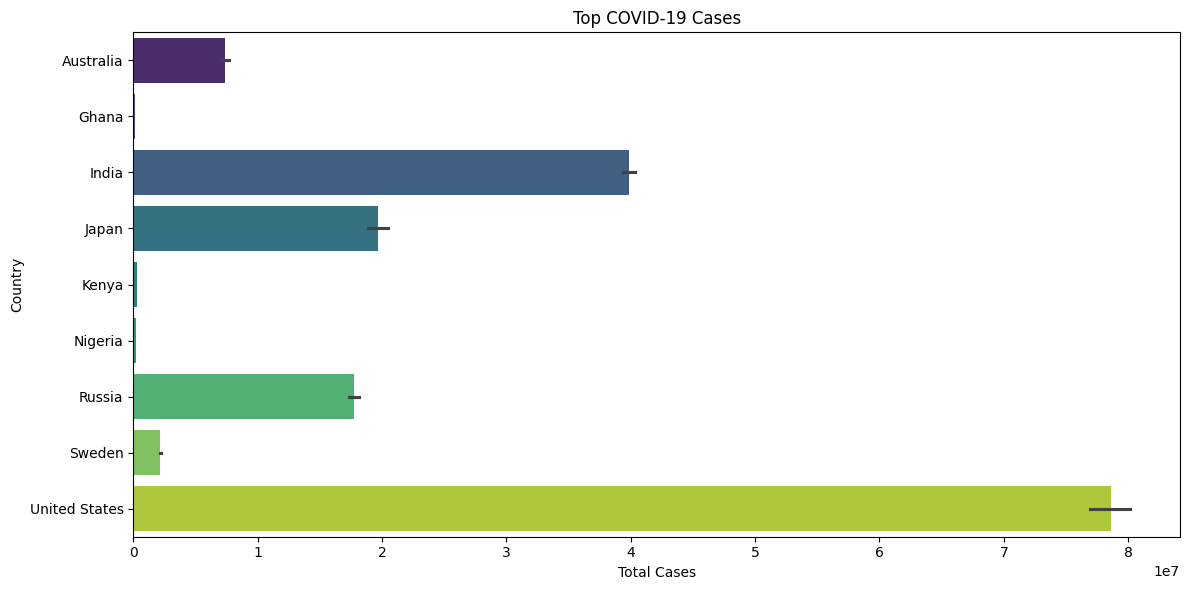

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot(countries, x="total_cases", y="location", palette="viridis")
plt.title("Top COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [99]:
countries["location"].unique()

array(['Australia', 'Ghana', 'India', 'Japan', 'Kenya', 'Nigeria',
       'Russia', 'Sweden', 'United States'], dtype=object)

In [102]:
selected_countries["location"].unique()

array(['Australia', 'Brazil', 'China', 'Ghana', 'India', 'Japan', 'Kenya',
       'Nigeria', 'Russia', 'Sweden', 'United States'], dtype=object)

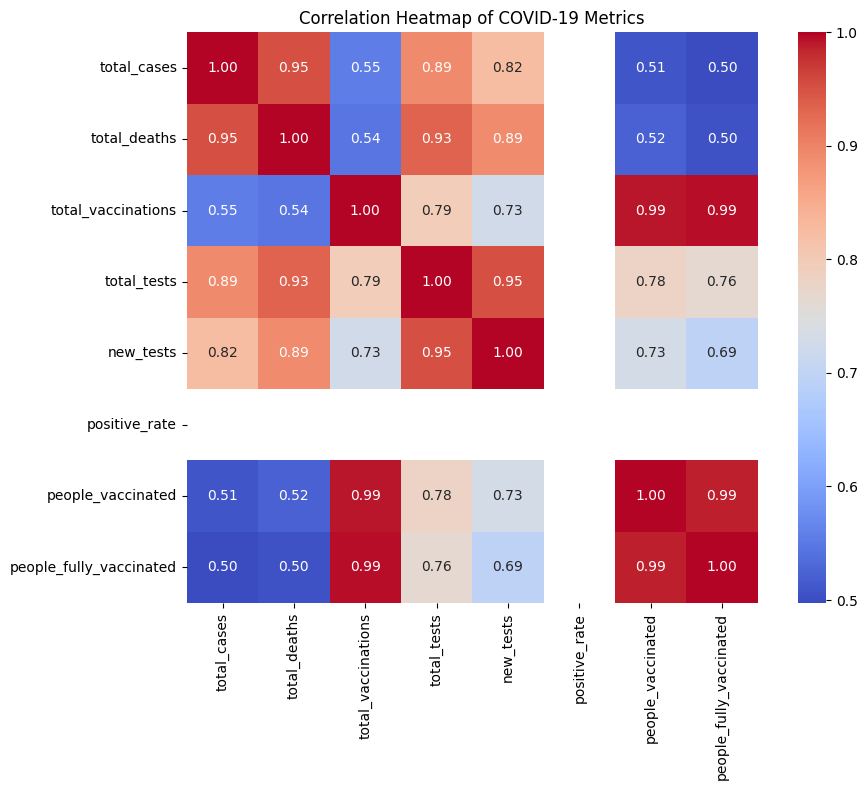

In [103]:
numeric_columns = countries[["total_cases", "total_deaths", "total_vaccinations",
                       "total_tests", "new_tests", "positive_rate", "people_vaccinated", "people_fully_vaccinated"]]


correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of COVID-19 Metrics")
plt.tight_layout()
plt.show()


In [107]:
countries["positive_rate"].isnull()

22191     False
22192     False
22193     False
22194     False
22195     False
          ...  
405120    False
405121    False
405122    False
405123    False
405124    False
Name: positive_rate, Length: 11151, dtype: bool

In [109]:
countries["positive_rate"].head()


22191    0.0
22192    0.0
22193    0.0
22194    0.0
22195    0.0
Name: positive_rate, dtype: float64

In [110]:
countries = countries.drop(columns=["positive_rate"])


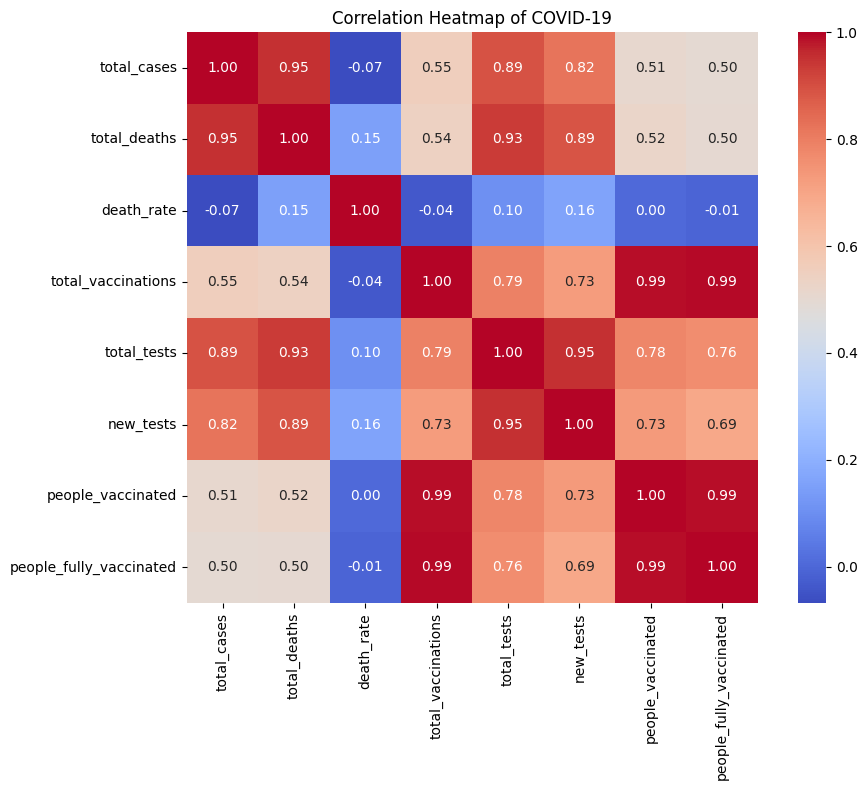

In [123]:
numeric_columns = countries[["total_cases", "total_deaths", "death_rate", "total_vaccinations",
                       "total_tests", "new_tests", "people_vaccinated", "people_fully_vaccinated"]]


correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of COVID-19")
plt.tight_layout()
plt.show()

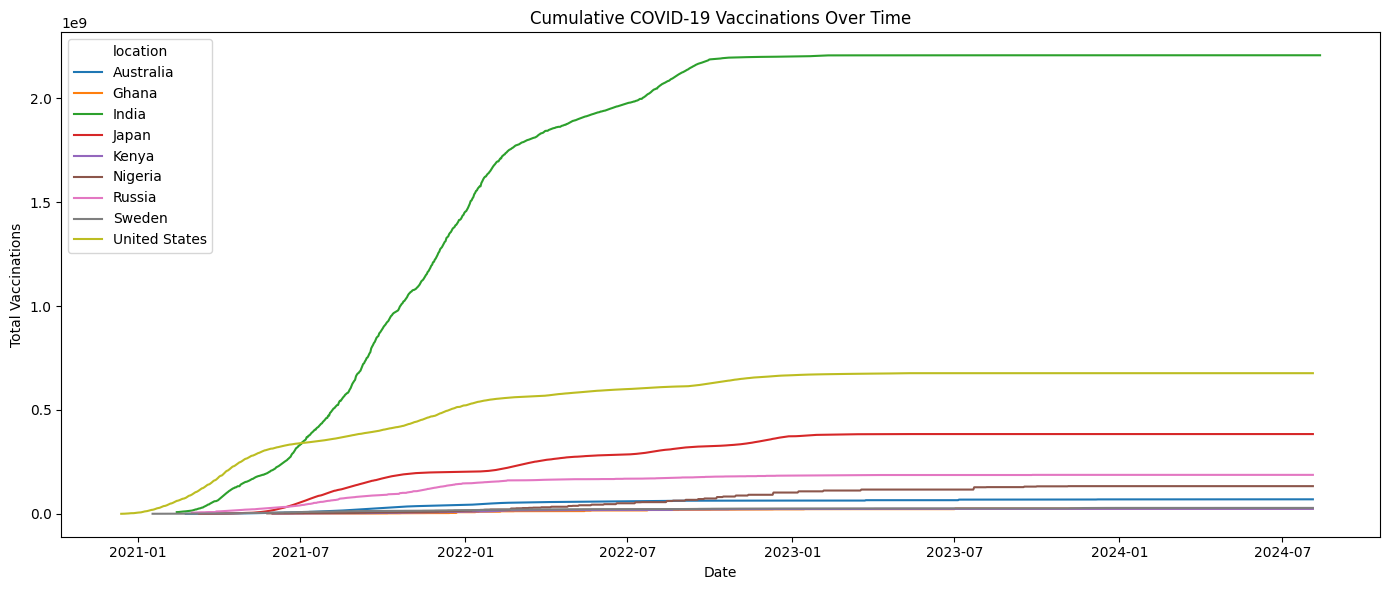

In [117]:
plt.figure(figsize=(14, 6))
sns.lineplot(countries, x="date", y="total_vaccinations", hue="location")
plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4356\2036931921.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(countries, x="percent_vaccinated", y="location", palette="crest")


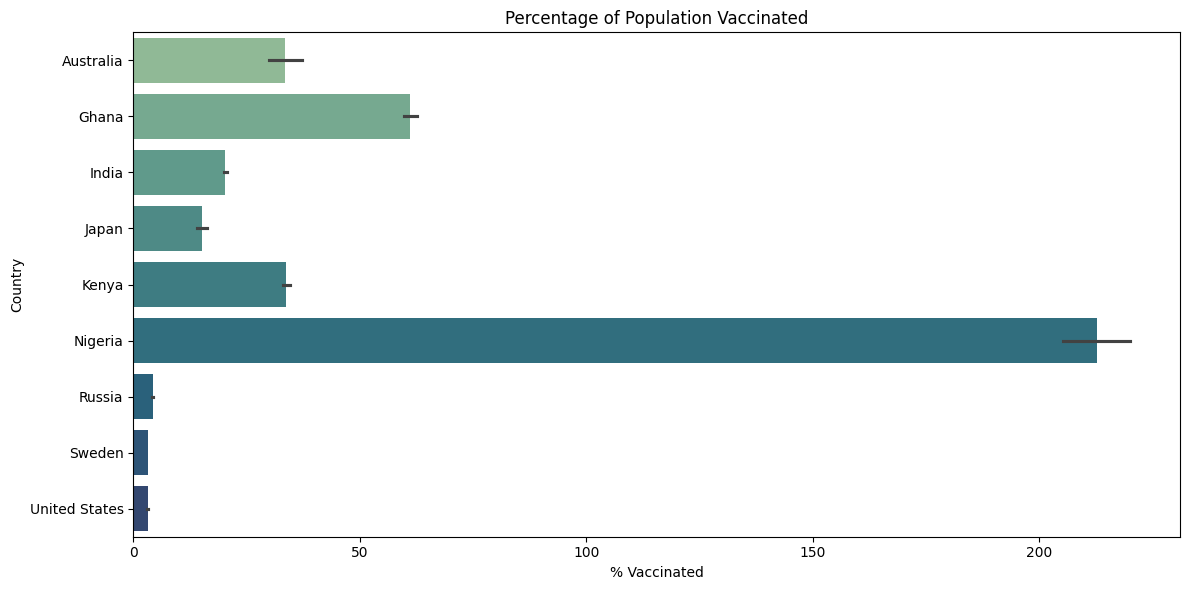

In [120]:
countries["percent_vaccinated"] = (countries["people_vaccinated"] / countries["total_cases"])

plt.figure(figsize=(12, 6))
sns.barplot(countries, x="percent_vaccinated", y="location", palette="crest")
plt.title("Percentage of Population Vaccinated")
plt.xlabel("% Vaccinated")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# COVID-19 Analysis Report

**Dataset:** [OWID - COVID-19 (OWID)]  
**Total entries:** 429,435 rows | 69 columns  
**Selected columns used for analysis:** ["location", "date", "total_cases", "total_deaths", "new_deaths",
"total_vaccinations", "total_tests", "new_tests", "positive_rate",
"people_vaccinated", "people_fully_vaccinated"]

## Data Cleaning

- There is a huge gap between the number of vaccinations and tests which were done verses the total number of cases recorded. They were a lot of missing values.
- Following countries were selected for the analysis:   **United States, India, Kenya, Ghana, China, Brazil, Nigeria, Australia, Sweden, Japan, Russia**

- Used forward fill(ffill) for cummulative series over time and mean for daily metries per country for the rest of the data for filling in missing values.

- Even after filling in the missing values, some rows still had missing values which were dropped. 

- Brazil and China were removed after dropping the rows with null values indicating that they had a lot of null values.


## Exploratory Data Analysis



####  **Total Cases Over Time**
- **United States** had the highest growth rate in total cases over time, followed by **India**.
- **Russia** initially showed a rise but became constant.
- **Japan** surpassed Russia in later stages.
- **Ghana, Kenya, Nigeria** had significantly fewer cases and slower growth.

####  **Total Deaths Over Time**
- Countries with highest number of cases had more deaths over time as shown.
- **United States** had a greater number of death rate over time, followed by **India** and **Russia**.
- **African countries** maintained relatively low death rates.


#### **Total Vaccinations Over Time**
- **India** had the highest vaccination rate over time.
- Followed by **United States** and **Japan**.
- Others countries showed steady but slower progress.
- African countries had a greater number of vaccinated people to the total number of cases.

#### Insights gotten
- There is a lot of missing data in terms of vaccination and testing as compared to the total cases.
- African countries had the lowest number of cases with greater rate of vaccination.
- Japan had low death rate as compared to the total number of deaths even though their cases rose over time maybe due to better containment of the virus.
- Strong correlation between total deaths and total cases.